# Import librairies et données

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
import statannotations

In [2]:
data_long = pd.read_csv("df_long_metrics_all.csv")

In [3]:
data_bc = pd.read_csv("df_bc.csv")

In [4]:
data = pd.read_csv("data_clean.csv")

In [5]:
data["degrees"] = data["degrees"].apply(lambda x: [int(char) for char in str(x) if char.isdigit()])

In [6]:
data_ex = data.explode("degrees")

In [7]:
data

,sp,boite,mesure,photo,nodes,edges,degrees,cycle density,total hyphal length,spatial density
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,"[1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, ...",0.063830,27172.814230,0.003141
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,"[1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, ...",0.166667,5174.771905,0.003525
2,gigaspora,34,1,G09_10_06_P03.pklclean,271,295,"[1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 3, ...",0.092251,31300.956237,0.003937
3,gigaspora,34,2,G09_16_06_P01.pklclean,27,36,"[1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.370370,2503.156934,0.095901
4,gigaspora,34,2,G09_16_06_P02.pklclean,47,53,"[1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, ...",0.148936,14402.975418,0.003400
...,...,...,...,...,...,...,...,...,...,...
520,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,"[1, 1, 1, 1, 1, 1]",0.179825,131443.376557,0.003692
521,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,"[1, 1, 1, 1, 1, 1]",0.160852,125972.189220,0.004859
522,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,"[1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, ...",0.174941,29921.226293,0.004262
523,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,"[1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, ...",0.198433,21063.123207,0.005682


In [8]:
data.dropna()

,sp,boite,mesure,photo,nodes,edges,degrees,cycle density,total hyphal length,spatial density
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,"[1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, ...",0.063830,27172.814230,0.003141
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,"[1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, ...",0.166667,5174.771905,0.003525
2,gigaspora,34,1,G09_10_06_P03.pklclean,271,295,"[1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 3, ...",0.092251,31300.956237,0.003937
3,gigaspora,34,2,G09_16_06_P01.pklclean,27,36,"[1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.370370,2503.156934,0.095901
4,gigaspora,34,2,G09_16_06_P02.pklclean,47,53,"[1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, ...",0.148936,14402.975418,0.003400
...,...,...,...,...,...,...,...,...,...,...
520,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,"[1, 1, 1, 1, 1, 1]",0.179825,131443.376557,0.003692
521,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,"[1, 1, 1, 1, 1, 1]",0.160852,125972.189220,0.004859
522,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,"[1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, ...",0.174941,29921.226293,0.004262
523,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,"[1, 1, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, ...",0.198433,21063.123207,0.005682


In [9]:
data_long

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,fractions_removed,fractions_connected_mean,robustness_score
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.704926,0.085291,2518.971515,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.858067,0.111427,1179.376082,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.90008613 0.76109044 0.48709551 0...,0.222635
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.660583,0.074682,2197.853800,[0. 0.05263158 0.10526316 0.15789474 0...,[1.00000000e+00 4.06567280e-01 7.32131094e-02 ...,0.059437
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.907063,0.482632,573.751799,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.814812,0.139679,1644.715483,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
...,...,...,...,...,...,...,...,...,...,...
391,rhizophagus,25,3,R25_07_07_P16.pklclean,0.680164,0.124679,2348.103686,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
392,rhizophagus,25,3,R25_07_07_P17.pklclean,0.693530,0.106414,4213.131494,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
393,rhizophagus,25,3,R25_07_07_P18.pklclean,0.704842,0.116806,3456.122857,[0. 0.05263158 0.10526316 0.15789474 0...,[1.00000000e+00 5.90424863e-01 1.71437020e-01 ...,0.071660
394,rhizophagus,25,3,R25_07_07_P19.pklclean,0.711990,0.108695,3131.582833,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000


In [10]:
data_bc

,sp,boite,mesure,photo,average bc nodes,average bc edges
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.085529,0.084967
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.182806,0.185990
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.066095,0.063659
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.216866,0.178379
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.146531,0.143281
...,...,...,...,...,...,...
136,rhizophagus,25,2,R25_30_06_P13.pklclean,0.060381,0.056295
137,rhizophagus,25,2,R25_30_06_P14.pklclean,0.089882,0.086325
138,rhizophagus,25,2,R25_30_06_P15.pklclean,0.033487,0.030071
139,rhizophagus,25,2,R25_30_06_P16.pklclean,0.025477,0.022698


In [11]:
sns.set_theme(style="whitegrid", context="paper", palette = "pastel")

# Mesures de base

## Nombre de nodes

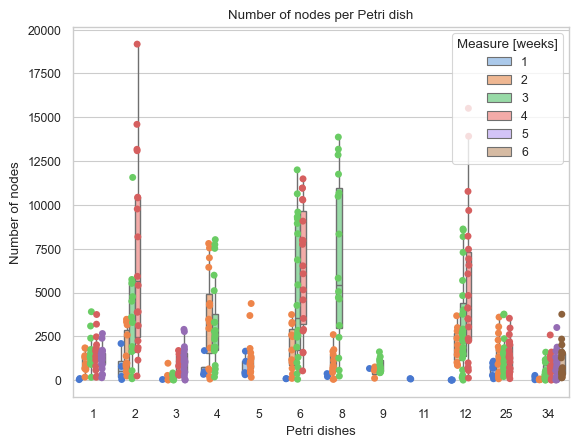

In [12]:
ax = sns.boxplot(x = "boite", y="nodes", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="nodes", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [weeks]')
ax.set_title("Number of nodes per Petri dish")
ax.set_ylabel("Number of nodes")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

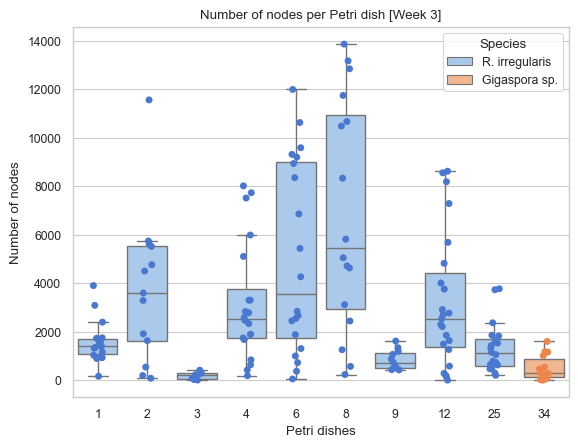

In [13]:
ax = sns.boxplot(x = "boite", y="nodes", data=data[data['mesure'] == 3], palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="boite", y="nodes", hue = "sp", data=data[data['mesure'] == 3], palette = "muted", dodge = False, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ["R. irregularis", "Gigaspora sp."])
ax.set_title("Number of nodes per Petri dish [Week 3]")
ax.set_ylabel("Number of nodes")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("nodes_m3_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.916e-04 U_stat=1.100e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.884e-01 U_stat=3.500e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.784e-05 U_stat=3.325e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.061e-04 U_stat=3.540e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.664e-02 U_stat=2.825e+02


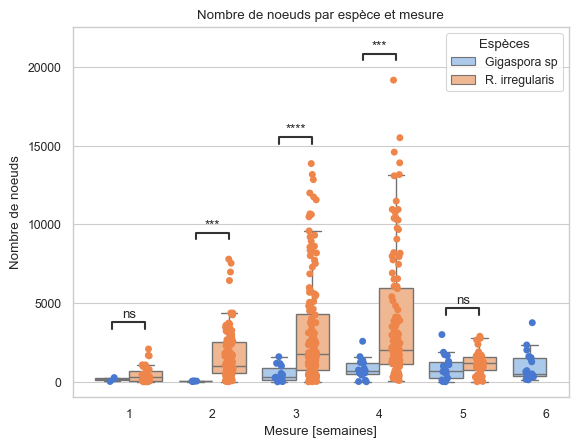

In [36]:
ax = sns.boxplot(x = "mesure", y="nodes", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="nodes", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèces', handles = handles, labels = ["Gigaspora sp", "R. irregularis"])
ax.set_title("Nombre de noeuds par espèce et mesure")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4, 5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="nodes", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("nodes_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

## Nombre de edges

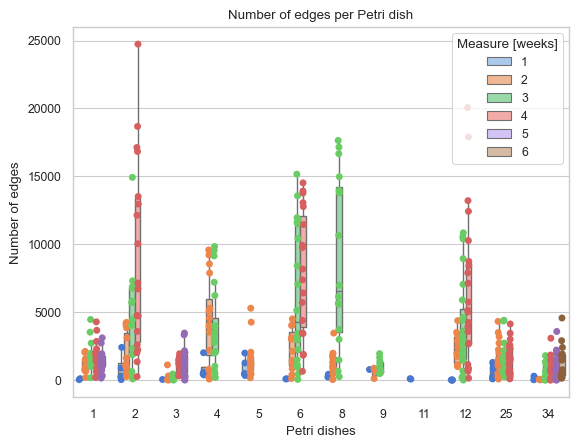

In [15]:
ax = sns.boxplot(x = "boite", y="edges", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="edges", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title = "Measure [weeks]")
ax.set_title("Number of edges per Petri dish")
ax.set_ylabel("Number of edges")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("edges_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.070e-04 U_stat=1.200e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.302e-01 U_stat=3.300e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.784e-05 U_stat=3.325e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:9.997e-05 U_stat=3.520e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.007e-01 U_stat=2.870e+02


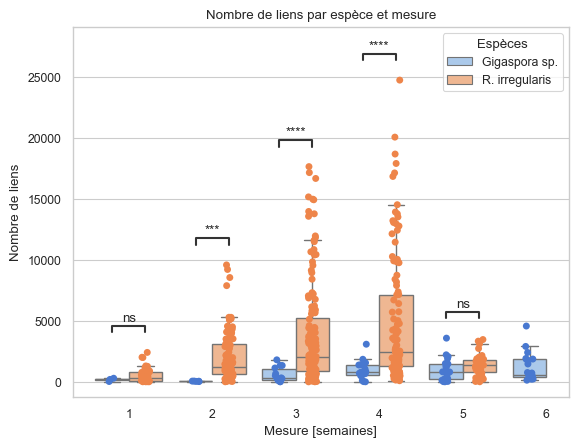

In [35]:
ax = sns.boxplot(x = "mesure", y="edges", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="edges", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèces', handles = handles, labels = ["Gigaspora sp.", "R. irregularis"])
ax.set_title("Nombre de liens par espèce et mesure")
ax.set_ylabel("Nombre de liens")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4, 5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="edges", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("edges_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

## Distibution des degrés

In [17]:
mean_deg = data_ex['degrees'].mean()

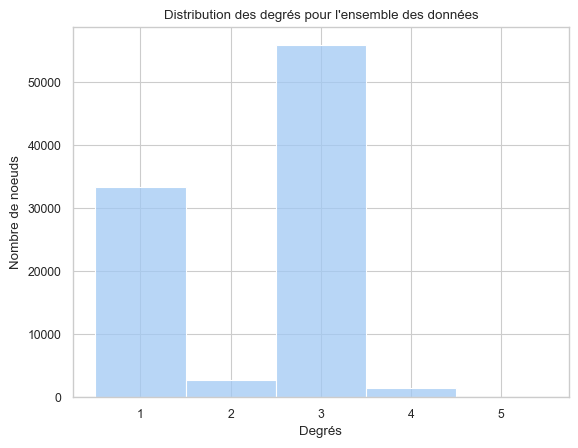

In [32]:
ax = sns.histplot(data = data_ex, x="degrees", bins=2, discrete = True)
ax.set_title("Distribution des degrés pour l'ensemble des données")
ax.set_xlabel("Degrés")
ax.set_ylabel("Nombre de noeuds")

ax.get_figure().savefig("degree_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

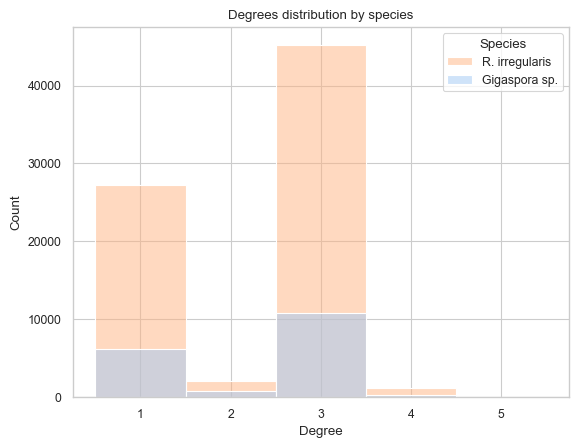

In [19]:
ax = sns.histplot(data_ex, x="degrees", palette = "pastel", hue = "sp", bins=2, discrete = True, legend = False)
ax.set_title("Degrees distribution by species")
ax.set_xlabel("Degree")
ax.legend(title='Species', loc='upper right', labels=['R. irregularis', 'Gigaspora sp.'])

ax.get_figure().savefig("degree_dist_sp")

## Cycle density

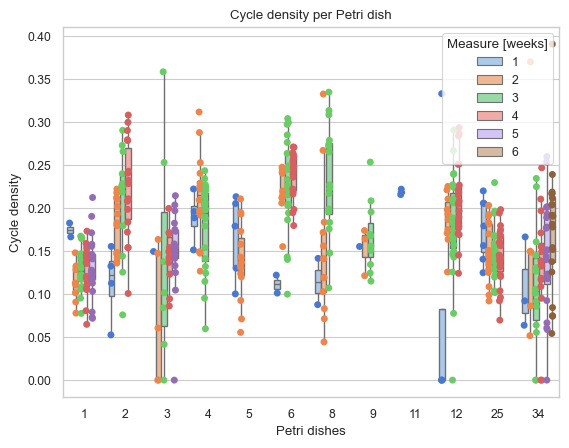

In [20]:
ax = sns.boxplot(x = "boite", y="cycle density", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="cycle density", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title = "Measure [weeks]")
ax.set_title("Cycle density per Petri dish")
ax.set_ylabel("Cycle density")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("cycle_d_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.463e-01 U_stat=2.270e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.208e-01 U_stat=2.850e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.026e-04 U_stat=4.600e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.105e-03 U_stat=5.170e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.911e-01 U_stat=4.335e+02


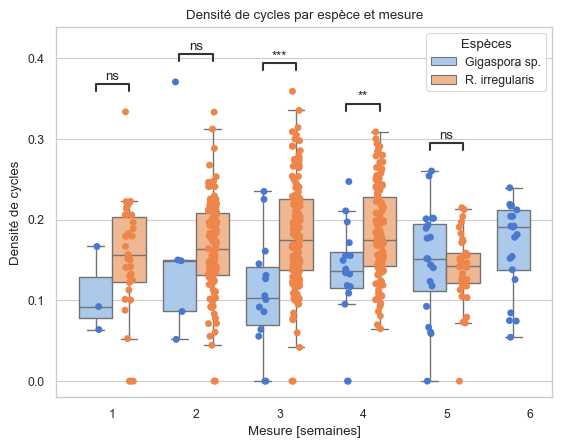

In [33]:
ax = sns.boxplot(x = "mesure", y="cycle density", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="cycle density", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèces', handles = handles, labels = ["Gigaspora sp.", "R. irregularis"])
ax.set_title("Densité de cycles par espèce et mesure")
ax.set_ylabel("Densité de cycles")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4, 5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="cycle density", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("cycle_d_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

## Total hyphal length

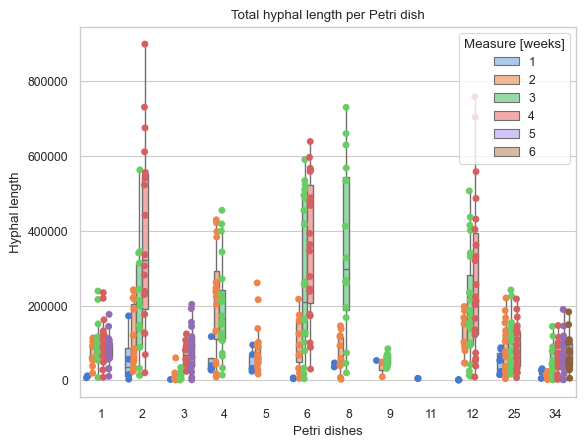

In [22]:
ax = sns.boxplot(x = "boite", y="total hyphal length", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="total hyphal length", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [weeks]')
ax.set_title("Total hyphal length per Petri dish")
ax.set_ylabel("Hyphal length")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("total_hyphal_length_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.126e-04 U_stat=4.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.543e-01 U_stat=4.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.641e-04 U_stat=4.570e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.400e-04 U_stat=3.820e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.088e-01 U_stat=3.110e+02


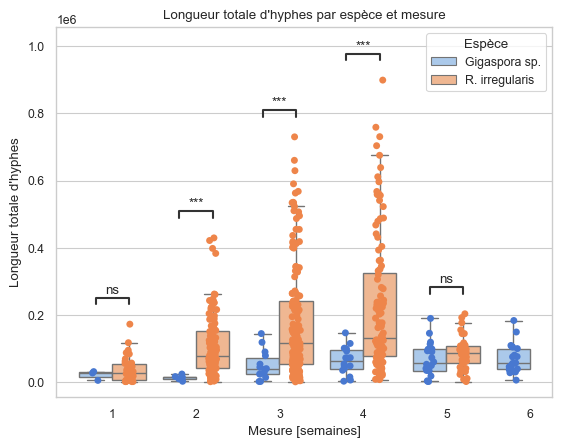

In [34]:
ax = sns.boxplot(x = "mesure", y="total hyphal length", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="total hyphal length", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèce', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Longueur totale d'hyphes par espèce et mesure")
ax.set_ylabel("Longueur totale d'hyphes")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4, 5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="total hyphal length", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("total_hyphal_length_fr",  dpi=250, bbox_inches='tight', pad_inches=0.1)

## Spatial density

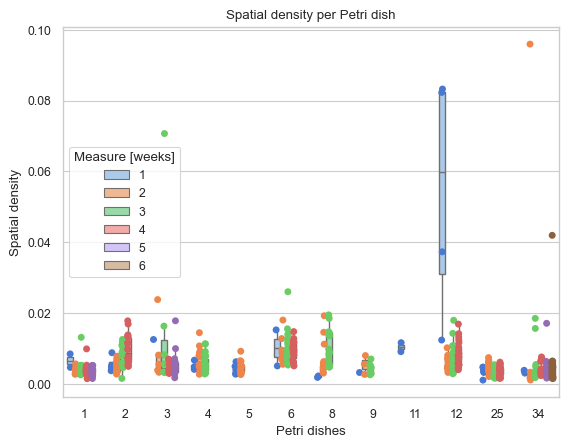

In [24]:
ax = sns.boxplot(x = "boite", y="spatial density", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="spatial density", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [weeks]')
ax.set_title("Spatial density per Petri dish")
ax.set_ylabel("Spatial density")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("spatial_d_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.795e-02 U_stat=1.300e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.045e-01 U_stat=2.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.917e-02 U_stat=6.895e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.538e-03 U_stat=4.720e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.407e-01 U_stat=4.500e+02


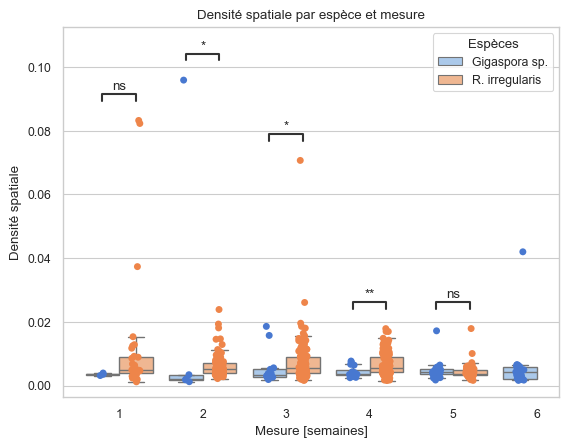

In [37]:
ax = sns.boxplot(x = "mesure", y="spatial density", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="spatial density", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèces', handles = handles, labels = ["Gigaspora sp.", "R. irregularis"])
ax.set_title("Densité spatiale par espèce et mesure")
ax.set_ylabel("Densité spatiale")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4, 5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="spatial density", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("spatial_d_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

## Evolution des métriques de base moyennes par boite

In [53]:
nodes_mean = data.groupby(['boite', 'mesure'])['nodes'].mean().reset_index(name='nodes')
nodes_mean['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values
# Display the mean values
print(nodes_mean)

    boite  mesure        nodes           sp
0       1       1    61.500000  rhizophagus
1       1       2  1056.555556  rhizophagus
2       1       3  1560.722222  rhizophagus
3       1       4  1550.789474  rhizophagus
4       2       1   781.000000  rhizophagus
5       2       2  1562.400000  rhizophagus
6       2       3  3764.923077  rhizophagus
7       2       4  7123.944444  rhizophagus
8       3       1    60.000000  rhizophagus
9       3       2   267.600000  rhizophagus
10      3       3   187.000000  rhizophagus
11      3       4   919.800000  rhizophagus
12      4       1   716.000000  rhizophagus
13      4       2  3633.750000  rhizophagus
14      5       1   768.000000  rhizophagus
15      6       1    84.500000  rhizophagus
16      6       2  1848.818182  rhizophagus
17      6       3  5021.700000  rhizophagus
18      6       4  6419.263158  rhizophagus
19      8       1   289.500000  rhizophagus
20      8       2   966.076923  rhizophagus
21      8       3  6810.812500  

In [54]:
nodes_mean = pd.DataFrame(nodes_mean)

Text(0.5, 0, 'Measure')

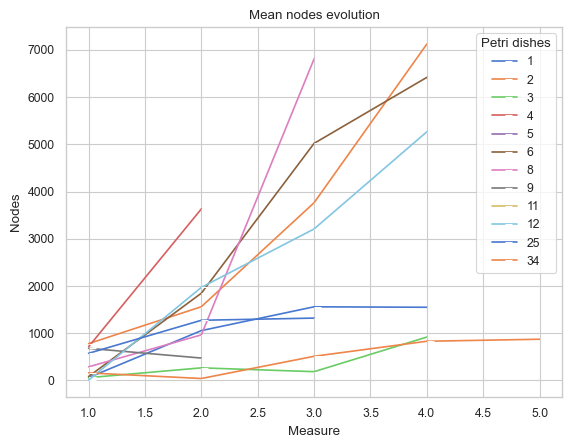

In [55]:
ax = sns.lineplot(x = "mesure", y="nodes", data=nodes_mean, palette = "muted", hue = "boite", marker=True, dashes = False, style = "boite")

ax.legend(title='Petri dishes')
ax.set_title("Mean nodes evolution")
ax.set_ylabel("Nodes")
ax.set_xlabel("Measure")

#ax.get_figure().savefig("spatial_d")

boite  mesure
1      1           71.500000
       2         1186.000000
       3         1766.666667
       4         1757.842105
2      1          893.750000
       2         1876.666667
       3         4695.846154
       4         8969.222222
3      1           68.000000
       2          307.000000
       3          221.714286
       4         1059.400000
4      1          854.250000
       2         4427.125000
5      1          906.800000
6      1           93.000000
       2         2265.090909
       3         6282.600000
       4         8021.263158
8      1          324.000000
       2         1141.538462
       3         8645.437500
9      1          786.000000
       2          552.333333
11     1           91.000000
12     1            7.500000
       2         2342.100000
       3         3899.956522
       4         6488.409091
25     1          682.000000
       2         1488.705882
       3         1528.950000
34     1          173.666667
       2           46.600000


Text(0.5, 0, 'Measure')

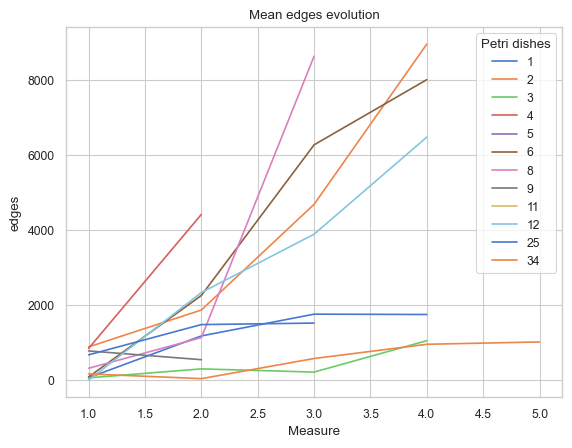

In [56]:
edges_mean = data.groupby(['boite', 'mesure'])['edges'].mean()

# Display the mean values
print(edges_mean)

edges_mean = pd.DataFrame(edges_mean)

ax = sns.lineplot(x = "mesure", y="edges", data=edges_mean, palette = "muted", hue = "boite")


ax.legend(title='Petri dishes')
ax.set_title("Mean edges evolution")
ax.set_ylabel("edges")
ax.set_xlabel("Measure")

#ax.get_figure().savefig("spatial_d")

boite  mesure
1      1         0.174731
       2         0.115138
       3         0.129025
       4         0.128112
2      1         0.113384
       2         0.182202
       3         0.209258
       4         0.223754
3      1         0.150000
       2         0.074388
       3         0.139662
       4         0.142978
4      1         0.189781
       2         0.213107
5      1         0.165767
6      1         0.111744
       2         0.221742
       3         0.224832
       4         0.238665
8      1         0.114758
       2         0.148869
       3         0.232885
9      1         0.155653
       2         0.153267
11     1         0.219066
12     1         0.083333
       2         0.187181
       3         0.180098
       4         0.207184
25     1         0.176223
       2         0.149304
       3         0.147876
34     1         0.107582
       2         0.161448
       3         0.109112
       4         0.133220
       5         0.148124
Name: cycle density, dty

Text(0.5, 0, 'Measure')

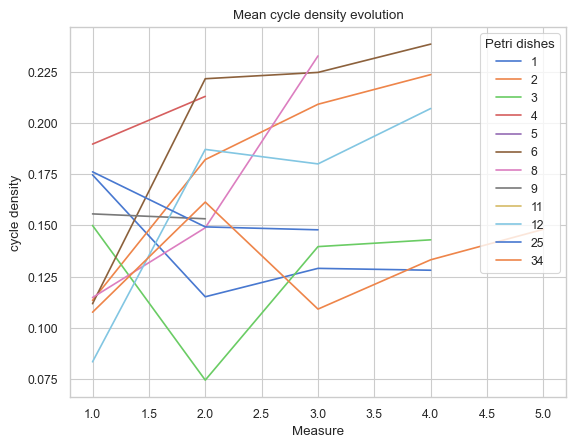

In [57]:
cycle_d_mean = data.groupby(['boite', 'mesure'])['cycle density'].mean()

# Display the mean values
print(cycle_d_mean)

cycle_d_mean = pd.DataFrame(cycle_d_mean)

ax = sns.lineplot(x = "mesure", y="cycle density", data=cycle_d_mean, palette = "muted", hue = "boite")


ax.legend(title='Petri dishes')
ax.set_title("Mean cycle density evolution")
ax.set_ylabel("cycle density")
ax.set_xlabel("Measure")

#ax.get_figure().savefig("spatial_d")

## Evolution de la longueur totale d'hyphes

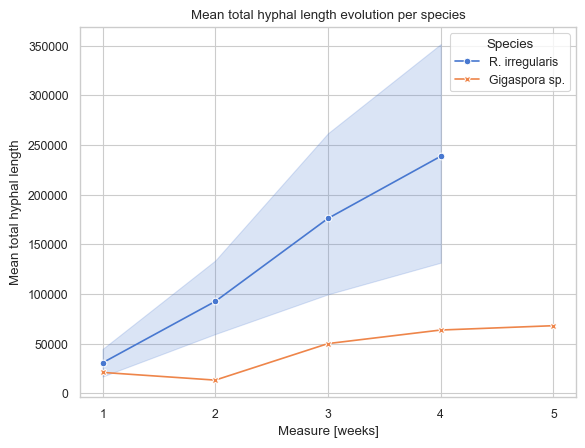

In [58]:
total_hyphal_length_mean = data.groupby(['boite', 'mesure'])['total hyphal length'].mean().reset_index(name='total hyphal length')
total_hyphal_length_mean['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values
# Display the mean values
#print(total_hyphal_length_mean)

total_hyphal_length_mean = pd.DataFrame(total_hyphal_length_mean)

ax = sns.lineplot(x = "mesure", y="total hyphal length", data=total_hyphal_length_mean, 
                  palette = "muted", hue = "sp", markers = True, style = "sp", dashes = False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(title='Species', handles = handles, labels=['R. irregularis', 'Gigaspora sp.']) 

ax.set_title("Mean total hyphal length evolution per species")
ax.set_ylabel("Mean total hyphal length")
ax.set_xlabel("Measure [weeks]")
ax.set_xticks(sorted(total_hyphal_length_mean["mesure"].unique()))

ax.get_figure().savefig("mean_hyphal_length_sp_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

## Rapport edges/nodes

In [24]:
data["edges_nodes"] = data["edges"]/data["nodes"]

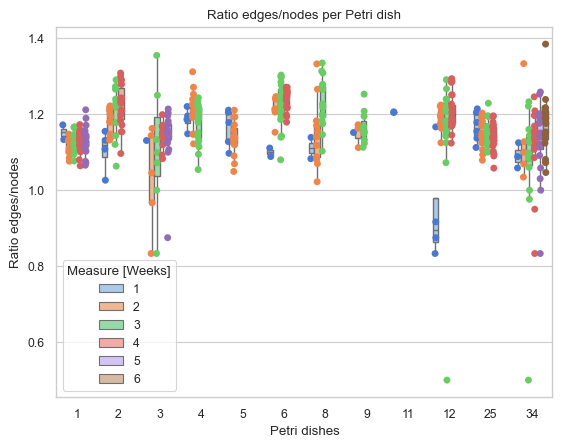

In [27]:
ax = sns.boxplot(x = "boite", y="edges_nodes", data=data, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="edges_nodes", hue = "mesure", data=data, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [Weeks]')
ax.set_title("Ratio edges/nodes per Petri dish")
ax.set_ylabel("Ratio edges/nodes")
ax.set_xlabel("Petri dishes")

ax.get_figure().savefig("edges_nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.093e-01 U_stat=1.630e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.963e-02 U_stat=1.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.050e-04 U_stat=4.520e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.802e-03 U_stat=5.150e+02
5_gigaspora vs. 5_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.861e-01 U_stat=4.340e+02


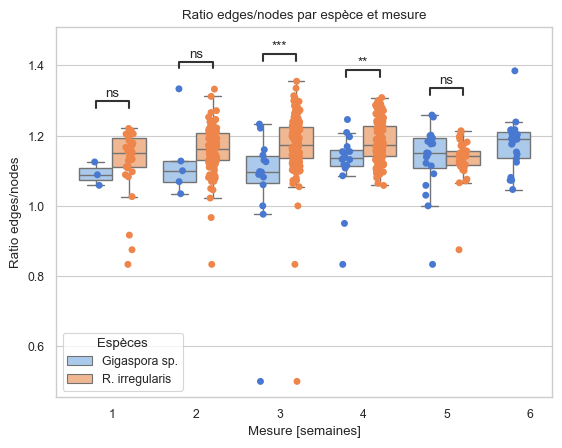

In [38]:
# graphe par espèces
ax = sns.boxplot(x = "mesure", y="edges_nodes", data=data, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="edges_nodes", hue = "sp", data=data, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Espèces', handles = handles, labels = ["Gigaspora sp.", "R. irregularis"])
ax.set_title("Ratio edges/nodes par espèce et mesure")
ax.set_ylabel("Ratio edges/nodes")
ax.set_xlabel("Mesure [semaines]")

unique_mesures = [1, 2, 3, 4,5]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data, x="mesure", y="edges_nodes", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.get_figure().savefig("edges_nodes_fr", dpi=250, bbox_inches='tight', pad_inches=0.1)

# Efficiency weighted

Text(0.5, 0, 'Petri dishes')

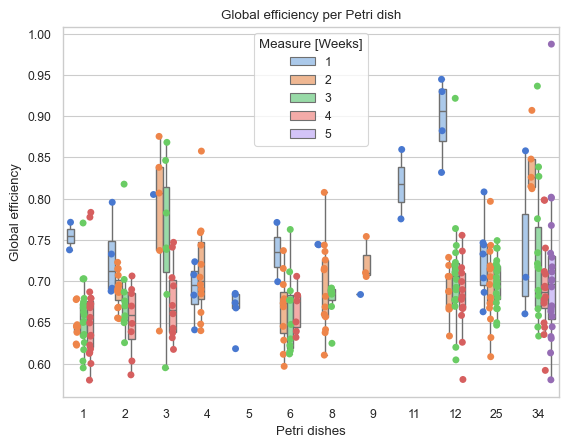

In [28]:
ax = sns.boxplot(x = "boite", y="global efficiency weighted", data=data_long, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="global efficiency weighted", hue = "mesure", data=data_long, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [Weeks]')
ax.set_title("Global efficiency per Petri dish")
ax.set_ylabel("Global efficiency")
ax.set_xlabel("Petri dishes")

# ax.get_figure().savefig("edges_nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.985e-06 U_stat=4.640e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.136e-01 U_stat=4.600e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.389e-02 U_stat=8.120e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.673e-02 U_stat=5.940e+02


(<Axes: title={'center': 'Global efficiency per species and measure'}, xlabel='Measure [weeks]', ylabel='Global efficiency'>,
  <statannotations.Annotation.Annotation at 0x22213cb9a60>])

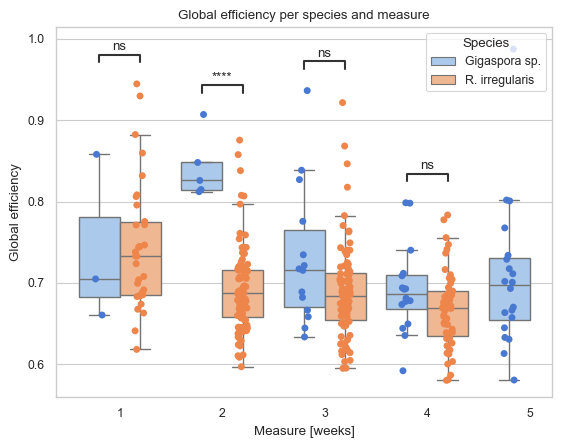

In [29]:
ax = sns.boxplot(x = "mesure", y="global efficiency weighted", data=data_long, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="global efficiency weighted", hue = "sp", data=data_long, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Global efficiency per species and measure")
ax.set_ylabel("Global efficiency")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2, 3, 4]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_long, x="mesure", y="global efficiency weighted", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

Text(0.5, 0, 'Petri dishes')

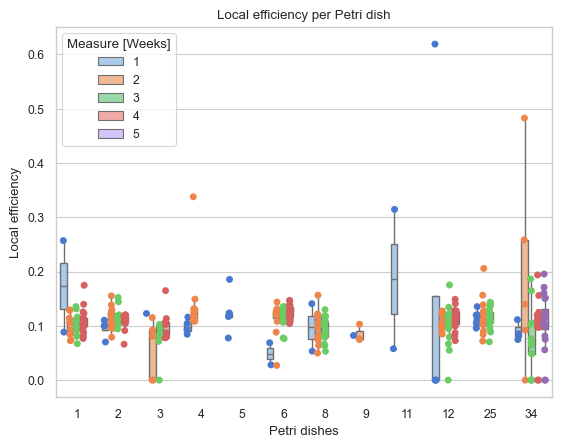

In [30]:
ax = sns.boxplot(x = "boite", y="local efficiency weighted", data=data_long, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="local efficiency weighted", hue = "mesure", data=data_long, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [Weeks]')
ax.set_title("Local efficiency per Petri dish")
ax.set_ylabel("Local efficiency")
ax.set_xlabel("Petri dishes")

# ax.get_figure().savefig("edges_nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.233e-01 U_stat=3.130e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.222e-01 U_stat=3.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.066e-03 U_stat=4.050e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.023e-01 U_stat=5.890e+02


(<Axes: title={'center': 'Local efficiency per species and measure'}, xlabel='Measure [weeks]', ylabel='Local efficiency'>,
  <statannotations.Annotation.Annotation at 0x222143c3f50>])

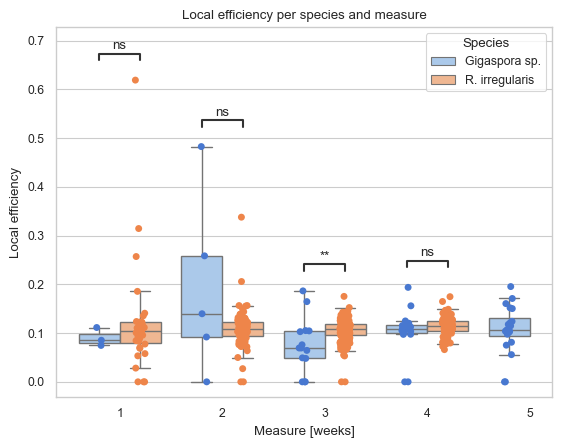

In [31]:
ax = sns.boxplot(x = "mesure", y="local efficiency weighted", data=data_long, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="local efficiency weighted", hue = "sp", data=data_long, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Local efficiency per species and measure")
ax.set_ylabel("Local efficiency")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2, 3, 4]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_long, x="mesure", y="local efficiency weighted", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

# Average shortest path

Text(0.5, 0, 'Petri dishes')

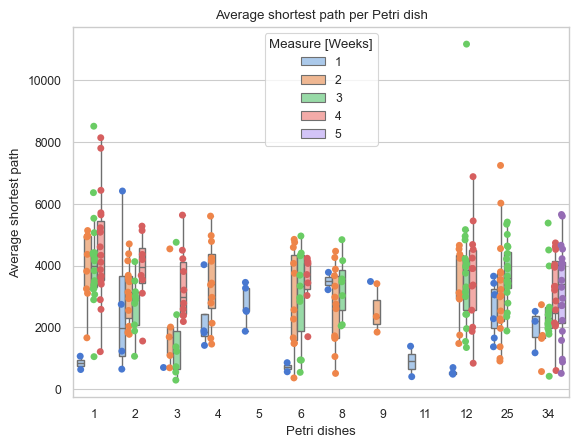

In [32]:
ax = sns.boxplot(x = "boite", y="average shortest path", data=data_long, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="average shortest path", hue = "mesure", data=data_long, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [Weeks]')
ax.set_title("Average shortest path per Petri dish")
ax.set_ylabel("Average shortest path")
ax.set_xlabel("Petri dishes")

# ax.get_figure().savefig("edges_nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.420e-02 U_stat=8.700e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.616e-02 U_stat=3.960e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.846e-01 U_stat=3.560e+02


(<Axes: title={'center': 'Average shortest path per species and measure'}, xlabel='Measure [weeks]', ylabel='Average shortest path'>,
  <statannotations.Annotation.Annotation at 0x2220fb45b50>])

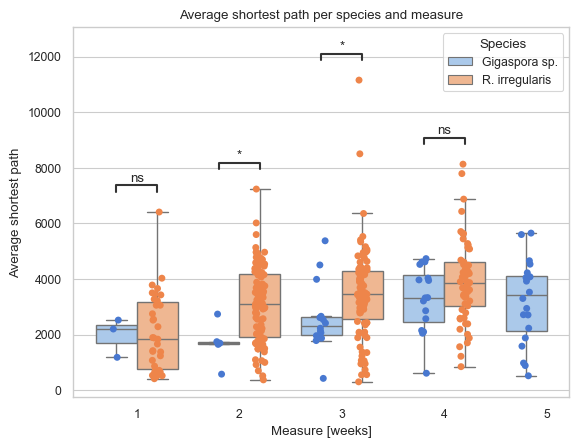

In [33]:
ax = sns.boxplot(x = "mesure", y="average shortest path", data=data_long, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="average shortest path", hue = "sp", data=data_long, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Average shortest path per species and measure")
ax.set_ylabel("Average shortest path")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2, 3, 4]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_long, x="mesure", y="average shortest path", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

# Robustness score

Text(0.5, 0, 'Petri dishes')

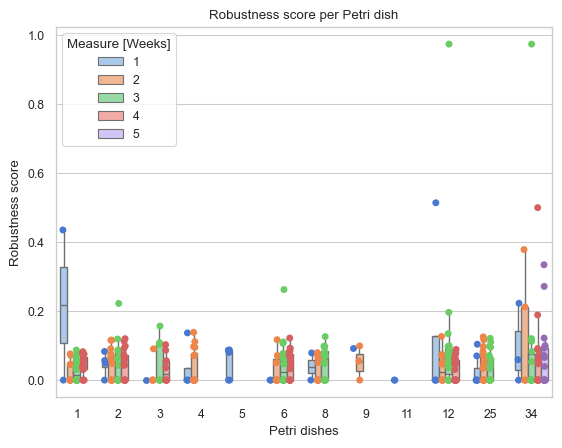

In [34]:
ax = sns.boxplot(x = "boite", y="robustness_score", data=data_long, palette = "pastel", hue = "mesure", showfliers = False)

sns.stripplot(x="boite", y="robustness_score", hue = "mesure", data=data_long, palette = "muted", dodge = True, legend = False)

ax.legend(title='Measure [Weeks]')
ax.set_title("Robustness score per Petri dish")
ax.set_ylabel("Robustness score")
ax.set_xlabel("Petri dishes")

# ax.get_figure().savefig("edges_nodes_clean", dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.256e-01 U_stat=2.775e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.808e-01 U_stat=6.550e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.163e-01 U_stat=7.145e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.844e-01 U_stat=7.480e+02


(<Axes: title={'center': 'Robustness score per species and measure'}, xlabel='Measure [weeks]', ylabel='Robustness score'>,
  <statannotations.Annotation.Annotation at 0x22213ef4560>])

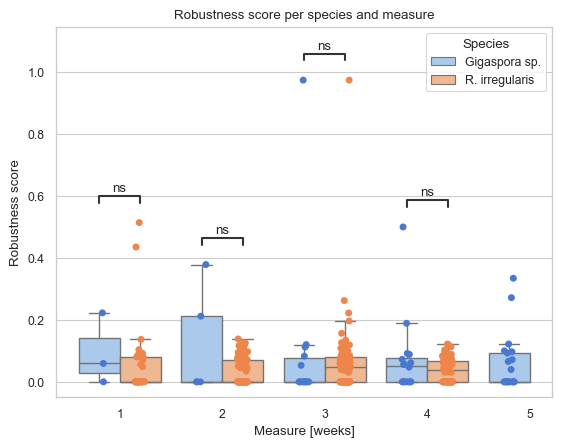

In [35]:
ax = sns.boxplot(x = "mesure", y="robustness_score", data=data_long, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="robustness_score", hue = "sp", data=data_long, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Robustness score per species and measure")
ax.set_ylabel("Robustness score")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2, 3, 4]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_long, x="mesure", y="robustness_score", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

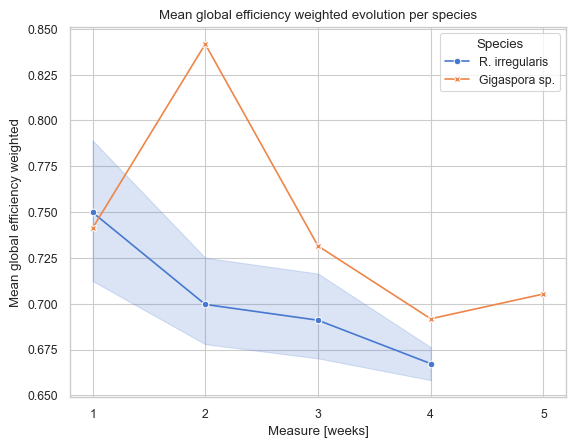

In [46]:
total_hyphal_length_mean = data_long.groupby(['boite', 'mesure'])['global efficiency weighted'].mean().reset_index(name='global efficiency weighted')
total_hyphal_length_mean['sp'] = data_long.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

# Display the mean values
#print(total_hyphal_length_mean)

total_hyphal_length_mean = pd.DataFrame(total_hyphal_length_mean)

ax = sns.lineplot(x = "mesure", y="global efficiency weighted", data=total_hyphal_length_mean, 
                  palette = "muted", hue = "sp", markers = True, style = "sp", dashes = False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(title='Species', handles = handles, labels=['R. irregularis', 'Gigaspora sp.']) 

ax.set_title("Mean global efficiency weighted evolution per species")
ax.set_ylabel("Mean global efficiency weighted")
ax.set_xlabel("Measure [weeks]")
ax.set_xticks(sorted(total_hyphal_length_mean["mesure"].unique()))

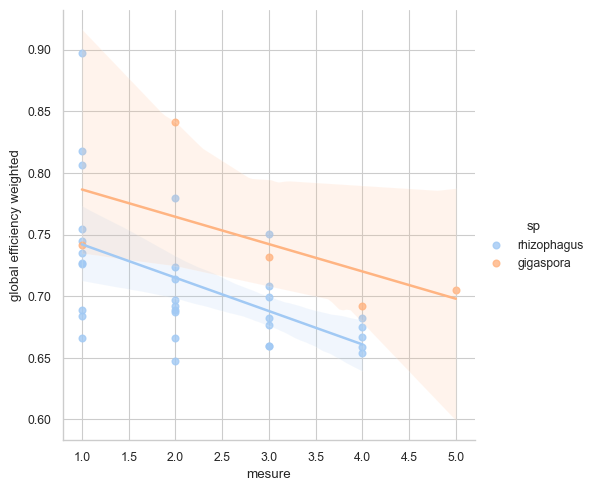

In [44]:
sns.lmplot(x = "mesure", y="global efficiency weighted", data=total_hyphal_length_mean, hue = "sp")

In [8]:
import pingouin as pg

In [9]:
mask = data_long["sp"] == "rhizophagus"

In [10]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
391     True
392     True
393     True
394     True
395     True
Name: sp, Length: 396, dtype: bool

In [11]:
data_long[mask]

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,fractions_removed,fractions_connected_mean,robustness_score
58,rhizophagus,1,1,R01_16_06_P01.pklclean,0.738071,0.257043,1069.923144,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
59,rhizophagus,1,1,R01_16_06_P02.pklclean,0.771506,0.088367,639.453064,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.98408121 0.78044569 0.75656036 0...,0.435140
60,rhizophagus,1,2,R01_23_06_P01.pklclean,0.678883,0.092488,1664.412983,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.41945391 0.15193183 0.06144554 0...,0.071548
61,rhizophagus,1,2,R01_23_06_P02.pklclean,0.647433,0.128335,3816.129595,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
62,rhizophagus,1,2,R01_23_06_P03.pklclean,0.644490,0.073775,4954.408504,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
...,...,...,...,...,...,...,...,...,...,...
391,rhizophagus,25,3,R25_07_07_P16.pklclean,0.680164,0.124679,2348.103686,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
392,rhizophagus,25,3,R25_07_07_P17.pklclean,0.693530,0.106414,4213.131494,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
393,rhizophagus,25,3,R25_07_07_P18.pklclean,0.704842,0.116806,3456.122857,[0. 0.05263158 0.10526316 0.15789474 0...,[1.00000000e+00 5.90424863e-01 1.71437020e-01 ...,0.071660
394,rhizophagus,25,3,R25_07_07_P19.pklclean,0.711990,0.108695,3131.582833,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000


In [12]:
df_rhizo = data_long[mask]

In [13]:
df_rhizo = df_rhizo.dropna()

In [53]:
pg.linear_regression(X = df_rhizo["mesure"], y = df_rhizo["global efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.744810,0.010031,74.250196,1.613917e-183,0.100698,0.097416,0.725062,0.764558
1,mesure,-0.019973,0.003606,-5.539030,7.130612e-08,0.100698,0.097416,-0.027071,-0.012874


In [54]:
pg.linear_regression(X = df_rhizo["mesure"], y = df_rhizo["local efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.114550,0.008329,13.753227,4.392119e-33,0.00169,-0.001953,0.098153,0.130947
1,mesure,-0.002039,0.002994,-0.681143,4.963561e-01,0.00169,-0.001953,-0.007933,0.003855


In [14]:
mask = data_long["sp"] == "gigaspora"

In [15]:
df_giga = data_long[mask]
df_giga = df_giga.dropna()

In [16]:
df_giga

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,fractions_removed,fractions_connected_mean,robustness_score
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.704926,0.085291,2518.971515,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.858067,0.111427,1179.376082,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.90008613 0.76109044 0.48709551 0...,0.222635
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.660583,0.074682,2197.853800,[0. 0.05263158 0.10526316 0.15789474 0...,[1.00000000e+00 4.06567280e-01 7.32131094e-02 ...,0.059437
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.907063,0.482632,573.751799,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.814812,0.139679,1644.715483,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
5,gigaspora,34,2,G09_16_06_P04.pklclean,0.812152,0.000000,2734.912345,[0. 0.05263158 0.10526316 0.15789474 0...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000
6,gigaspora,34,2,G09_16_06_P05.pklclean,0.826012,0.091955,1742.146510,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.79881041 0.55457363 0.51219242 0...,0.211850
7,gigaspora,34,2,G09_16_06_P06.pklclean,0.848072,0.258442,1689.552602,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 0.95539355 0.90190019 0.77705202 0...,0.378353
8,gigaspora,34,3,G09_23_06_P01.pklclean,0.644594,0.048065,1781.215795,[0. 0.05263158 0.10526316 0.15789474 0...,[1.00000000e+00 6.57100224e-01 4.16377673e-01 ...,0.112349
9,gigaspora,34,3,G09_23_06_P02.pklclean,0.936433,0.000000,1957.335560,[0. 0.05263158 0.10526316 0.15789474 0...,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...,0.973684


In [61]:
pg.linear_regression(X = df_giga["mesure"], y = df_giga["global efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.810596,0.036180,22.404836,1.236111e-29,0.105949,0.089984,0.738120,0.883073
1,mesure,-0.023595,0.009159,-2.576092,1.265753e-02,0.105949,0.089984,-0.041943,-0.005247


In [62]:
pg.linear_regression(X = df_giga["mesure"], y = df_giga["local efficiency weighted"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.119263,0.033457,3.564655,0.000754,0.003628,-0.014164,0.052241,0.186286
1,mesure,-0.003825,0.008470,-0.451584,0.653313,0.003628,-0.014164,-0.020792,0.013142


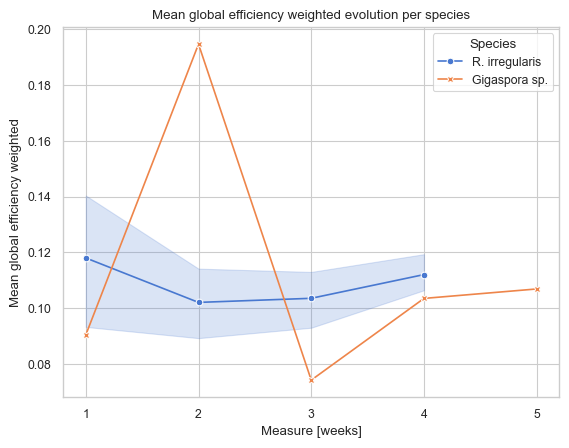

In [55]:
total_hyphal_length_mean = data_long.groupby(['boite', 'mesure'])['local efficiency weighted'].mean().reset_index(name='local efficiency weighted')
total_hyphal_length_mean['sp'] = data_long.groupby(['boite', 'mesure'])['sp'].first().values #à verifier
# Display the mean values
#print(total_hyphal_length_mean)

total_hyphal_length_mean = pd.DataFrame(total_hyphal_length_mean)

ax = sns.lineplot(x = "mesure", y="local efficiency weighted", data=total_hyphal_length_mean, 
                  palette = "muted", hue = "sp", markers = True, style = "sp", dashes = False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(title='Species', handles = handles, labels=['R. irregularis', 'Gigaspora sp.']) 

ax.set_title("Mean global efficiency weighted evolution per species")
ax.set_ylabel("Mean global efficiency weighted")
ax.set_xlabel("Measure [weeks]")
ax.set_xticks(sorted(total_hyphal_length_mean["mesure"].unique()))

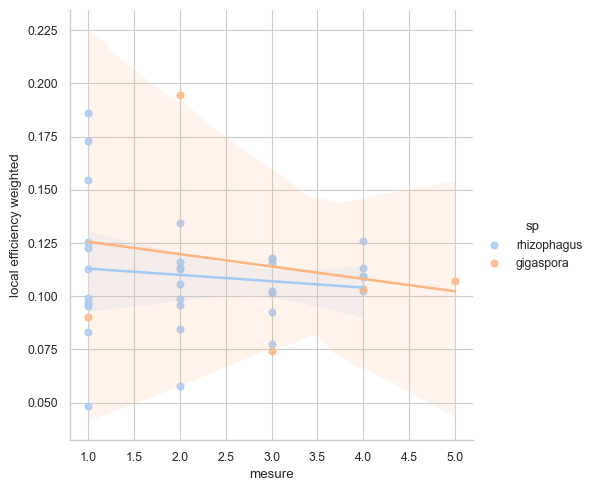

In [56]:
sns.lmplot(x = "mesure", y="local efficiency weighted", data=total_hyphal_length_mean, hue = "sp")

In [63]:
data_bc

,sp,boite,mesure,photo,average bc nodes,average bc edges
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.085529,0.084967
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.182806,0.185990
2,gigaspora,34,1,G09_10_06_P03.pklclean,0.066095,0.063659
3,gigaspora,34,2,G09_16_06_P01.pklclean,0.216866,0.178379
4,gigaspora,34,2,G09_16_06_P02.pklclean,0.146531,0.143281
...,...,...,...,...,...,...
136,rhizophagus,25,2,R25_30_06_P13.pklclean,0.060381,0.056295
137,rhizophagus,25,2,R25_30_06_P14.pklclean,0.089882,0.086325
138,rhizophagus,25,2,R25_30_06_P15.pklclean,0.033487,0.030071
139,rhizophagus,25,2,R25_30_06_P16.pklclean,0.025477,0.022698


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.839e-05 U_stat=4.710e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.786e-01 U_stat=6.200e+01


(<Axes: title={'center': 'Average bc nodes per species and measure'}, xlabel='Measure [weeks]', ylabel='Average bc nodes'>,
  <statannotations.Annotation.Annotation at 0x2220fe0e870>])

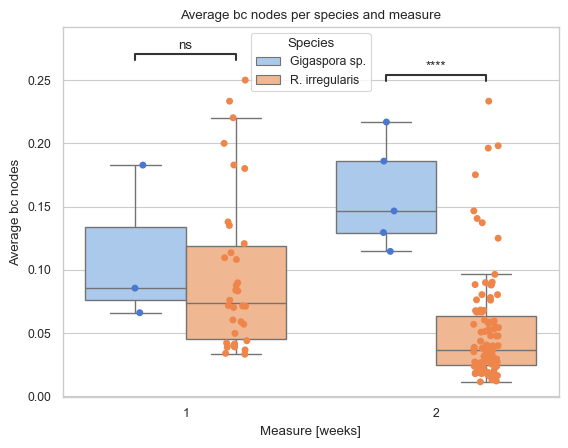

In [65]:
ax = sns.boxplot(x = "mesure", y="average bc nodes", data=data_bc, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="average bc nodes", hue = "sp", data=data_bc, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Average bc nodes per species and measure")
ax.set_ylabel("Average bc nodes")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc nodes", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.115e-05 U_stat=4.720e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.389e-01 U_stat=6.600e+01


(<Axes: title={'center': 'Average bc edges per species and measure'}, xlabel='Measure [weeks]', ylabel='Average bc edges'>,
  <statannotations.Annotation.Annotation at 0x2221b98f3e0>])

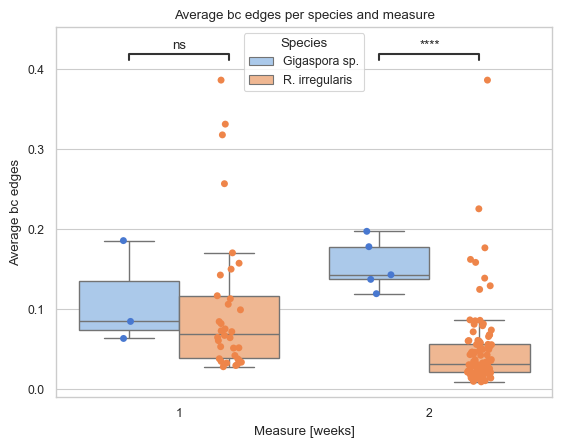

In [66]:
ax = sns.boxplot(x = "mesure", y="average bc edges", data=data_bc, palette = "pastel", hue = "sp", showfliers = False)

sns.stripplot(x="mesure", y="average bc edges", hue = "sp", data=data_bc, palette = "muted", dodge = True, legend = False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Species', handles = handles, labels = ['Gigaspora sp.', 'R. irregularis'])
ax.set_title("Average bc edges per species and measure")
ax.set_ylabel("Average bc edges")
ax.set_xlabel("Measure [weeks]")

unique_mesures = [1, 2]
# unique_mesures = data["mesure"].unique()
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures] # avoir le meme nombre de mesures

from statannotations.Annotator import Annotator
annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc edges", hue = "sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# ax.get_figure().savefig("total_hyphal_length_sp_clean",  dpi=250, bbox_inches='tight', pad_inches=0.1)

In [14]:
!pip list

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
app-model                         0.3.1
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
args                              0.1.0
arrow                             1.2.3
astroid                           2.14.2
astropy           